In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 必要なライブラリ
import os
import requests
import zipfile
import pandas as pd

# tqdm は進捗バー、必要なら以下でインストール
# !pip install tqdm
from tqdm import tqdm

# 保存先フォルダ（Drive 上）
dataset_dir = "/content/drive/MyDrive/datasciense00/datasets"
os.makedirs(dataset_dir, exist_ok=True)

# ベースURL（0000.zipのみ使用）
base_url = "https://dlsv.dsc.nii.ac.jp/idr/b1023027@fun.ac.jp/83d587ac5f24b4c2/nicocomm/data.20211222/comment"
zip_name = "0000.zip"
url = f"{base_url}/{zip_name}"
zip_path = os.path.join(dataset_dir, zip_name)

# ダウンロード
if not os.path.exists(zip_path):
    print(f"Downloading {zip_name}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(zip_path, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download {zip_name}: Status code {response.status_code}")
else:
    print(f"{zip_name} already downloaded.")

# 展開
extract_path = os.path.join(dataset_dir, zip_name.replace(".zip", ""))
if not os.path.exists(extract_path):
    print(f"Extracting {zip_name}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print(f"{zip_name} already extracted.")

# ファイル一覧からCSVまたはTSVファイルを1つ読み込み
csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv") or f.endswith(".tsv")]
if csv_files:
    first_file = os.path.join(extract_path, csv_files[0])
    df = pd.read_csv(first_file, sep='\t' if first_file.endswith(".tsv") else ',')
    print("✅ カラム名一覧:")
    print(df.columns)
else:
    print("CSVまたはTSVファイルが見つかりませんでした。")

Extracting 0000.zip...
CSVまたはTSVファイルが見つかりませんでした。


In [10]:
import os
import json

# 明示的に探索先フォルダを指定（Drive 上の展開済みフォルダ）
extract_path = "/content/drive/MyDrive/datasciense00/datasets/0000/0000"

# jsonlファイルを探す
jsonl_files = [f for f in os.listdir(extract_path) if f.endswith(".jsonl")]
if jsonl_files:
    first_jsonl = os.path.join(extract_path, jsonl_files[0])
    print(f"✅ 読み込むファイル: {first_jsonl}")

    # 最初の数行を読み込んで中身確認
    with open(first_jsonl, 'r', encoding='utf-8') as f:
        for i in range(5):  # 最初の5行を表示
            line = f.readline()
            if not line:
                break
            data = json.loads(line)
            print(f"\n🔹 {i+1}行目のデータ:")
            print(data)
            print("キー一覧:", list(data.keys()))
else:
    print("❌ jsonlファイルが見つかりませんでした。")

✅ 読み込むファイル: /content/drive/MyDrive/datasciense00/datasets/0000/0000/sm8736000.jsonl

🔹 1行目のデータ:
{'date': '2009-11-07T12:31:59+09:00', 'content': '１', 'command': '184', 'vpos': 0, 'easy': False, 'owner': False}
キー一覧: ['date', 'content', 'command', 'vpos', 'easy', 'owner']

🔹 2行目のデータ:
{'date': '2009-11-10T19:54:24+09:00', 'content': 'このサムスも超うまいけど誰だろう？', 'command': '184', 'vpos': 24900, 'easy': False, 'owner': False}
キー一覧: ['date', 'content', 'command', 'vpos', 'easy', 'owner']

🔹 3行目のデータ:
{'date': '2009-11-10T19:59:25+09:00', 'content': '早いお', 'command': '184', 'vpos': 15308, 'easy': False, 'owner': False}
キー一覧: ['date', 'content', 'command', 'vpos', 'easy', 'owner']

🔹 4行目のデータ:
{'date': '2009-11-14T16:49:11+09:00', 'content': 'サムスの上手い人てーと丈助、マチョピチュとか', 'command': '184', 'vpos': 24600, 'easy': False, 'owner': False}
キー一覧: ['date', 'content', 'command', 'vpos', 'easy', 'owner']

🔹 5行目のデータ:
{'date': '2009-11-14T16:49:33+09:00', 'content': 'プレイヤーも書いてほしい', 'command': '184', 'vpos': 6213, 'eas

In [13]:
import glob

base_path = "/content/drive/MyDrive/datasciense00/datasets/0000/0000/"  # フォルダ階層は環境に応じて修正してください

monthly_counts = Counter()

# 複数jsonlファイルを読み込み
for filepath in glob.glob(base_path + "*.jsonl"):
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            if 'date' in data:
                try:
                    dt = datetime.fromisoformat(data['date'])
                    month_str = dt.strftime('%Y-%m')
                    monthly_counts[month_str] += 1
                except Exception as e:
                    pass

# 結果表示
for month, count in sorted(monthly_counts.items()):
    print(f"{month}: {count}件")


2007-03: 397件
2007-04: 2575件
2007-05: 6827件
2007-06: 5843件
2007-07: 25744件
2007-08: 22839件
2007-09: 18232件
2007-10: 22439件
2007-11: 25175件
2007-12: 78038件
2008-01: 38011件
2008-02: 76462件
2008-03: 65738件
2008-04: 35585件
2008-05: 73588件
2008-06: 51090件
2008-07: 57663件
2008-08: 57764件
2008-09: 46654件
2008-10: 41661件
2008-11: 36856件
2008-12: 29995件
2009-01: 29727件
2009-02: 159783件
2009-03: 37218件
2009-04: 28777件
2009-05: 29674件
2009-06: 26153件
2009-07: 35861件
2009-08: 26147件
2009-09: 20976件
2009-10: 30158件
2009-11: 43016件
2009-12: 29879件
2010-01: 55531件
2010-02: 34127件
2010-03: 33728件
2010-04: 29487件
2010-05: 30201件
2010-06: 47719件
2010-07: 38639件
2010-08: 48601件
2010-09: 31140件
2010-10: 29767件
2010-11: 43674件
2010-12: 32504件
2011-01: 31686件
2011-02: 51824件
2011-03: 29003件
2011-04: 25625件
2011-05: 26548件
2011-06: 70024件
2011-07: 49334件
2011-08: 37771件
2011-09: 50417件
2011-10: 35597件
2011-11: 23982件
2011-12: 23597件
2012-01: 36432件
2012-02: 25027件
2012-03: 30175件
2012-04: 23965件
2012-05: 320

<ipython-input-14-3048067518>:15: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

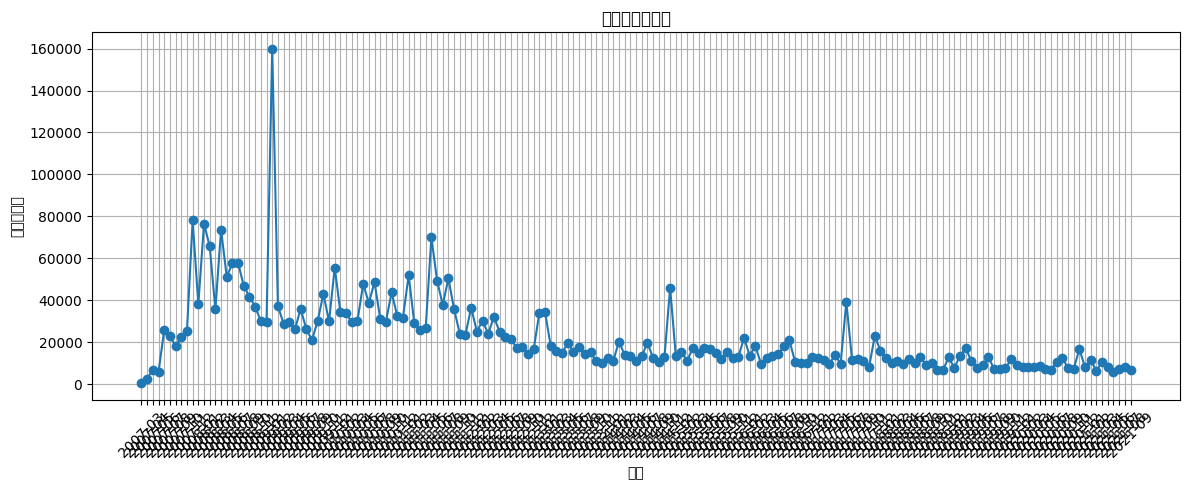

In [14]:
import matplotlib.pyplot as plt

# 日付と件数をリストに（ソート）
months = sorted(monthly_counts.keys())
counts = [monthly_counts[m] for m in months]

# プロット
plt.figure(figsize=(12, 5))
plt.plot(months, counts, marker='o')
plt.xticks(rotation=45)
plt.title("月別コメント数")
plt.xlabel("年月")
plt.ylabel("コメント数")
plt.grid(True)
plt.tight_layout()
plt.show()
